# Underwater Hyperspectral Imaging - Reflectance Correction

- A hyperspectral image in reflectance $R(\lambda)$ is the ratio of wavelength radiance measurements from a given surface divided by a reference spectrum, on a per pixel basis. A custom Python script (analysis\underwater-reflectance-conversion.py) was created for batch conversion of Equation (2) adapted from Mogstad et al. (2017).

**Objectives**:
- Get Dry $L_{u}$ of White Spectralon
- Get Dry $L_{u}$ of PE panel
- Get Underwater $L_{u}$ of PE panel
- Convert to $R(\lambda)$

## Import required libraries

In [1]:
import os
from pathlib import Path
import numpy as np
import spectral as sp
import matplotlib.pyplot as plt
import scipy.signal as ss

### Working Paths
- Where data files are stored

In [2]:
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-RadCorr")
## Output path
out_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\results")

### Open white reference file

In [3]:
## ENVI open uses the header metadata. Until .load method is used data will be loaded to memory.
hdr = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-RadCorr\2012-01-01_00-34-35_-FC-_WhiteRefDry_radiance.hdr"
dat = r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-RadCorr\2012-01-01_00-34-35_-FC-_WhiteRefDry_radiance.dat"
white_open = sp.envi.open(hdr, dat)

## Extract wavelengths as a vector for pre-processing
bands_vector = [float(i) for i in white_open.metadata['wavelength']]

In [4]:
print('First and last band')
print(bands_vector[0], bands_vector[-1])

First and last band
394.36 1001.96


In [5]:
bands_vector[179]

700.12

### White reference

ImageView object:
  Display bands       :  [163, 125, 59]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 4629.0]
    G: [21.0, 14007.0]
    B: [0.0, 5317.0]

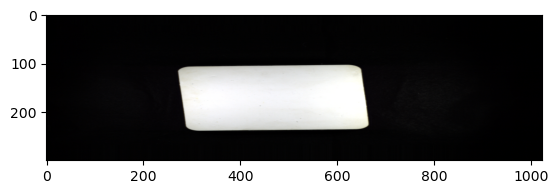

In [6]:
%matplotlib inline

## Choose coordinates to Crop
sp.imshow(white_open, stretch=0.02)

ImageView object:
  Display bands       :  (58, 128, 163)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 4966.0]
    G: [22.0, 13303.0]
    B: [0.0, 4629.0]

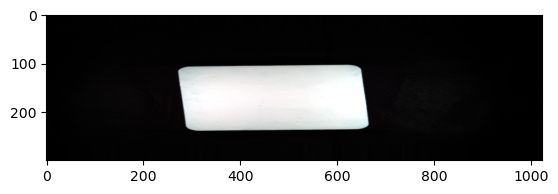

In [7]:
#%matplotlib notebook
whiteref_data = white_open.load()
sp.imshow(whiteref_data,(58,128,163), stretch=0.02)

ImageView object:
  Display bands       :  (58, 128, 163)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4038.0, 5119.0]
    G: [11073.0, 14069.0]
    B: [3831.0, 4898.0]

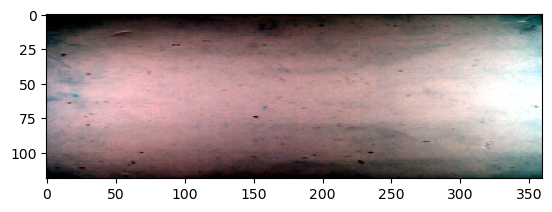

In [8]:
# Get region of panel
whiteref_panel = whiteref_data[114:233,290:650,:] ## Y1:Y2,X1:X2,All bands

sp.imshow(whiteref_panel,(58,128,163), stretch=0.02)

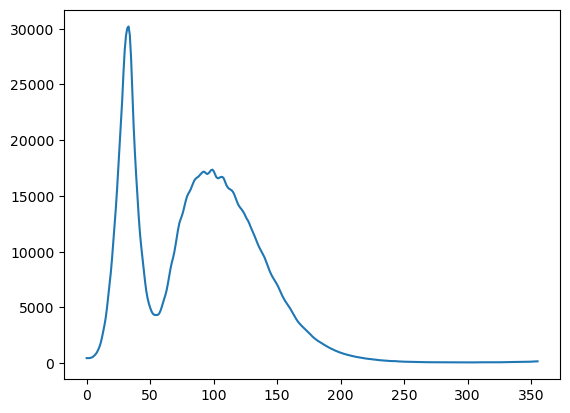

In [9]:
spectralon = whiteref_panel.mean(axis=(0,1))
plt.plot(spectralon)

In [10]:
# Export calibration target
# out_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Numpy")
out_path_lu = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Lu-Arrays")

# np.save(out_path / 'Spectralon', spectralon)
# sp.envi.save_image(out_path_lu / 'lu_spectralon.hdr', whiteref_panel, interleave='bil', metadata=whiteref_data.metadata)

## Open Dry White Plastic Ref

ImageView object:
  Display bands       :  [163, 125, 59]
  Interpolation       :  <default>
  RGB data limits     :
    R: [2.0, 3665.0]
    G: [27.0, 11629.0]
    B: [0.0, 4622.0]

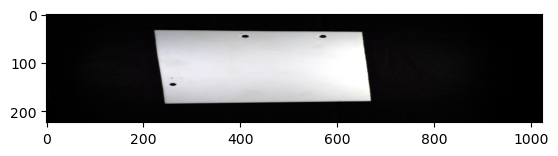

In [11]:
## ENVI open uses the header metadata. Until .load method is used data will be loaded to memory.
hdr = files_path / "2012-01-01_00-39-02_-FC-_WhiteRef-Plastic_radiance.hdr"
dat = files_path / "2012-01-01_00-39-02_-FC-_WhiteRef-Plastic_radiance.dat"
white_pvcdry_open = sp.envi.open(hdr, dat)
sp.imshow(white_pvcdry_open, stretch=0.02)

In [12]:
white_pvcdry_data = white_pvcdry_open.load()

ImageView object:
  Display bands       :  [0, 178, 355]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 877.0]
    G: [568.0, 2138.0]
    B: [0.0, 770.0]

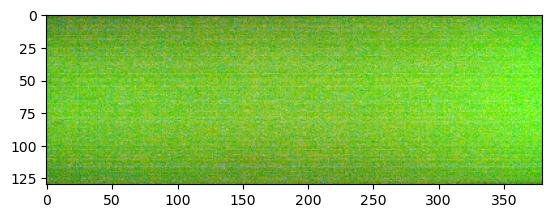

In [13]:
# Get regions of pvc panel
whiteref_drypvc = white_pvcdry_data[50:180,270:650,:] ## Y1:Y2,X1:X2,All bands
sp.imshow(whiteref_drypvc)

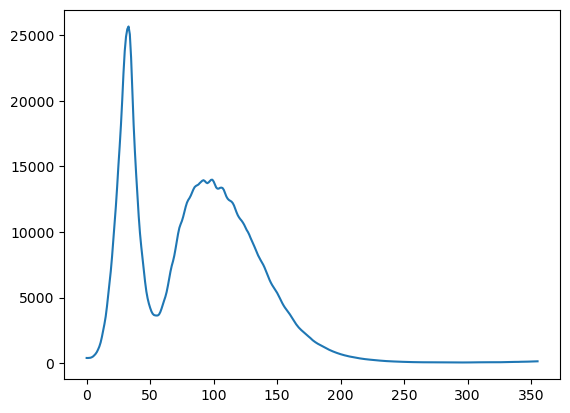

In [14]:
dry_pvc = whiteref_drypvc.mean(axis=(0,1))
plt.plot(dry_pvc)

In [15]:
# Export calibration target
# np.save(out_path / 'White-Dry-PVC.npy', dry_pvc)

# sp.envi.save_image(out_path_lu / 'lu_dry_pvc.hdr', whiteref_drypvc, interleave='bil', metadata=whiteref_data.metadata)

## Open Underwater White Ref

ImageView object:
  Display bands       :  [163, 125, 59]
  Interpolation       :  <default>
  RGB data limits     :
    R: [14.0, 2171.0]
    G: [75.0, 7415.0]
    B: [17.0, 2934.0]

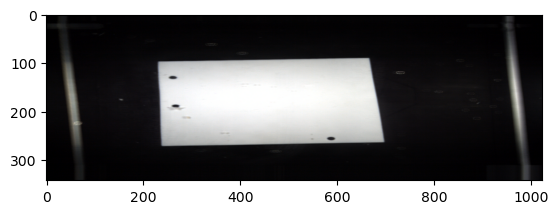

In [16]:
## ENVI open uses the header metadata. Until .load method is used data will be loaded to memory.
hdr = files_path / "2012-01-01_01-02-14_-FC-_WhiteRef-Plastic-UW_radiance.hdr"
dat = files_path / "2012-01-01_01-02-14_-FC-_WhiteRef-Plastic-UW_radiance.dat"
white_pvcwet_open = sp.envi.open(hdr, dat)
sp.imshow(white_pvcwet_open, stretch=0.02)

In [17]:
white_pvcwet_data = white_pvcwet_open.load()

ImageView object:
  Display bands       :  [0, 178, 355]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 727.0]
    G: [739.0, 1260.0]
    B: [0.0, 784.0]

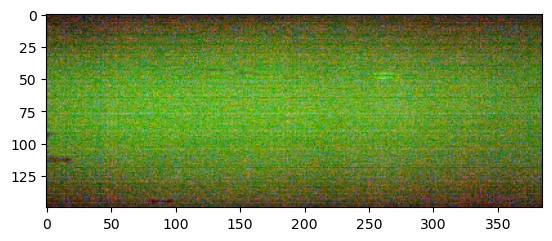

In [18]:
# Get regions of pvc panel
whiteref_wetpvc = white_pvcwet_data[100:250,280:665,:] ## Y1:Y2,X1:X2,All bands
sp.imshow(whiteref_wetpvc)

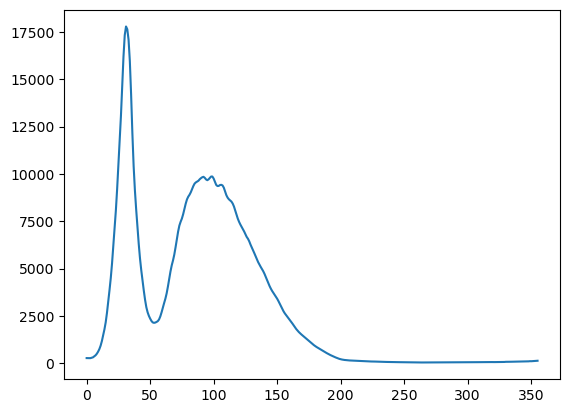

In [19]:
wet_pvc = whiteref_wetpvc.mean(axis=(0,1))
plt.plot(wet_pvc)

In [30]:
# Export calibration targets
# np.save(out_path / 'White-UW-PVC.npy', wet_pvc)
# sp.envi.save_image(out_path_lu / 'lu_wet_pvc.hdr', whiteref_wetpvc, interleave='bil', metadata=whiteref_data.metadata)

In [20]:
len(bands_vector)

356

## Plot for Radiance comparison

Equation (1):

$R(\lambda) = \dfrac{L_{u\, \mathrm{Target}}(\lambda)}{L_{u\, \mathrm{PE:UW}}(\lambda)} \times \dfrac{L_{u\, \mathrm{PE\,dry}}(\lambda)}{L_{u\, \mathrm{Spectralon\, dry}}(\lambda)} \times R_{Spectralon}(\lambda),$

where $L_{u\, \mathrm{Target}}(\lambda)$ is each scene of individual trays containing 8 to 6 oyster valves. $L_{u\, \mathrm{PE:UW}}(\lambda)$ represents the radiance of the polyethylene plate being immersed under water. $L_{u\, \mathrm{PE\,dry}}(\lambda)$ being the radiance of same polyethylene plate in air. $L_{u\, \mathrm{Spectralon\, dry}}(\lambda)$ is the radiance from the Spectralon reference plaque in air.

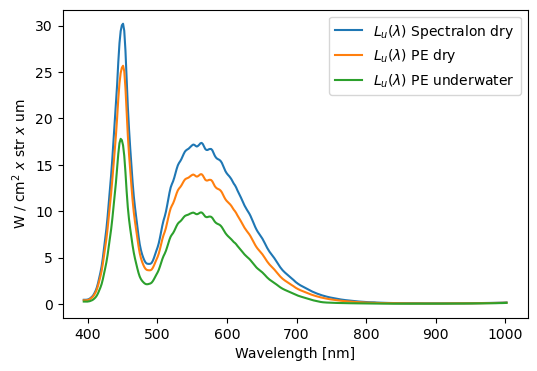

In [23]:
import matplotlib.ticker as ticker
xticks = np.linspace(bands_vector[0], bands_vector[-1],30)
# Define the millions_formatter function
def millions_formatter(x, pos):
    return '{:.0f}'.format(x/1000)

plt.figure(figsize=(6,4))
plt.plot(np.linspace(394,1002,356), spectralon, label='$L_{u}(\lambda)$ Spectralon dry')
plt.plot(np.linspace(394,1002,356), dry_pvc, label='$L_{u}(\lambda)$ PE dry')
plt.plot(np.linspace(394,1002,356), wet_pvc, label='$L_{u}(\lambda)$ PE underwater')
plt.legend(fontsize='medium')
# plt.xticks(np.linspace(394,800,235), fontsize=8.5, rotation=90)
plt.xlabel('Wavelength [nm]')
plt.ylabel('W / cm$^2$ $x$ str $x$ um')

# # Create the y-axis formatter and apply it to the y-axis tick labels
formatter = ticker.FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# plt.savefig(out_path / 'Radiance-Panel-Comparison.png', dpi=600)
plt.show()

```python
## Underwater-Reflectance-Conversion.py

import os
from pathlib import Path
import numpy as np
import spectral as sp
# import scipy.signal as ss
# import matplotlib.pyplot as plt

## Function: Radiance to Reflectance - Underwater
def radiance2reflectance(img_array, bands, dry_plastic, wet_plastic):
    unfold_array = img_array.reshape(-1, len(bands))
    _reflectance = (np.divide(unfold_array, wet_plastic) * dry_plastic)
    img_reflectance = np.reshape(_reflectance, img_array.shape)
    print('Completed Radiance to Reflectance')
    return img_reflectance

## Directories
files_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-RadCorr")
hdr_list = list(files_path.glob('*.HDR'))
rad_list = list(files_path.glob('*.DAT'))
out_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Reflectance")
# sg_out_path = Path(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-SG-Reflectance")

## Reference plaques
open_refl_spectralon = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_spectralon.hdr",
                               r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_spectralon.img")

refl_spectralon = open_refl_spectralon.load()

r_spectralon = refl_spectralon.mean(axis=(0,1))
lu_spectralon = np.load(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Numpy\Spectralon.npy")
lu_dry_pvc = np.load(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Numpy\White-Dry-PVC.npy")
lu_wet_pvc = np.load(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Numpy\White-UW-PVC.npy")

r_dry_pvc = (np.divide(lu_dry_pvc, lu_spectralon) * r_spectralon)

## Reflectance loop
for i, file in enumerate(hdr_list):
    print(hdr_list[i])
    target_open = sp.envi.open(hdr_list[i], rad_list[i])
    bands_vector = target_open.metadata['wavelength']
    target_data = target_open.load()
    target_reflectance = radiance2reflectance(target_data, bands_vector, r_dry_pvc, lu_wet_pvc)
    reflectance = target_reflectance[:,190:700,:] # Crop to specimen tray, removes unnecessary pixels.
    os.chdir(out_path)
    sp.envi.save_image(hdr_list[i].stem.replace('radiance','reflectance')+'.hdr', reflectance, interleave='bil', metadata=target_open.metadata)
    sp.save_rgb(hdr_list[i].stem.replace('radiance','rgb')+'.tiff', reflectance, [144,92,42])

print('All done :)')
```

### Plot - Reflectance panel comparison

In [25]:
import scipy.signal as ss

## Reference plaques
open_refl_spectralon = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_spectralon.hdr",
                               r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_spectralon.img")

refl_spectralon = open_refl_spectralon.load()
r_spectralon = refl_spectralon.mean(axis=(0,1))

# Dry Polyethylene
open_dry_pe = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_dry_pvc.hdr",
                               r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_dry_pvc.img")
dry_pe = open_dry_pe.load()
r_dry_pe = dry_pe.mean(axis=(0,1))

# Under water Polyethylene
open_uw_pe = sp.envi.open(r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_wet_pvc.hdr",
                               r"C:\Users\jcmontes\OneDrive - University of Tasmania\01_Projects_Drive\UHI_Tank\data\JCMH-FC-Refl-Panels\Refl_wet_pvc.img")
uw_pe = open_uw_pe.load()
r_uw_pe = uw_pe.mean(axis=(0,1))

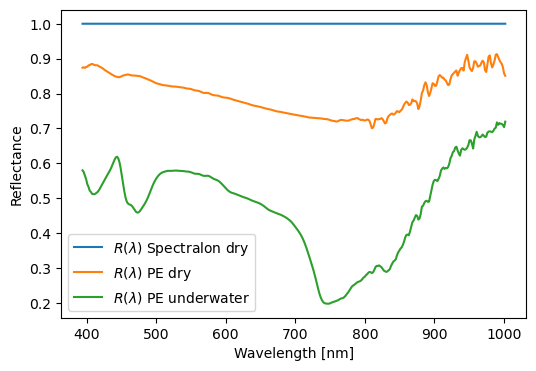

In [27]:
plt.figure(figsize=(6,4))

plt.plot(np.linspace(394,1002,356), ss.savgol_filter(refl_spectralon.mean(axis=(0,1)), 3, 1), label = "$R(\lambda)$ Spectralon dry")

plt.plot(np.linspace(394,1002,356), ss.savgol_filter(dry_pe.mean(axis=(0,1)), 3,1), label = "$R(\lambda)$ PE dry")

plt.plot(np.linspace(394,1002,356), ss.savgol_filter(uw_pe.mean(axis=(0,1)), 3,1), label = "$R(\lambda)$ PE underwater")

plt.legend(fontsize='medium', loc='best')
# plt.xticks(xticks, fontsize=8.5, rotation=90)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')
# plt.savefig(out_path / 'Reflectance-Panel-Comparison.png', dpi=600)
plt.show()